In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATIENT_PATH = "dataset/schizophrenia/"
HEALTHY_PATH = "dataset/healthy/"
patient = pd.read_csv(PATIENT_PATH + "patient_0.csv", index_col=0)
healthy = pd.read_csv(HEALTHY_PATH + "healthy0.csv", index_col=0)

In [3]:
patient.head()

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
F7,108.01,208.82,388.84,446.45,446.45,349.24,86.41,7.20,7.20,86.41,...,46.81,7.20,-111.61,-190.82,-352.84,-471.65,-532.86,-532.86,-410.44,-331.24
F3,176.42,237.63,309.63,417.65,439.25,356.44,108.01,46.81,147.62,266.43,...,259.23,237.63,7.20,-151.22,-392.44,-471.65,-550.86,-572.46,-532.86,-493.25
F4,-90.01,-72.01,-111.61,-162.02,-122.41,-72.01,46.81,86.41,118.81,158.42,...,187.22,79.21,-291.63,-493.25,-500.45,-432.05,-370.84,-493.25,-702.08,-691.28
F8,7.20,18.00,-82.81,-151.22,-140.42,-32.40,118.81,129.61,28.80,7.20,...,118.81,39.60,-280.83,-410.44,-381.64,-313.23,-331.24,-471.65,-792.09,-831.69
T3,39.60,129.61,277.23,356.44,309.63,208.82,-10.80,-43.20,7.20,79.21,...,0.00,-32.40,-180.02,-291.63,-471.65,-572.46,-583.26,-550.86,-360.04,-270.03


In [4]:
## slicing data
patient_trimmed = patient #.iloc[:,:3840] '''currently on 1 minute data uncomment iloc for 30 seconds data'''
healthy_trimmed = healthy #.iloc[:,:3840] '''currently on 1 minute data uncomment iloc for 30 seconds data'''

In [5]:
patient_trimmed.head()

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
F7,108.01,208.82,388.84,446.45,446.45,349.24,86.41,7.20,7.20,86.41,...,46.81,7.20,-111.61,-190.82,-352.84,-471.65,-532.86,-532.86,-410.44,-331.24
F3,176.42,237.63,309.63,417.65,439.25,356.44,108.01,46.81,147.62,266.43,...,259.23,237.63,7.20,-151.22,-392.44,-471.65,-550.86,-572.46,-532.86,-493.25
F4,-90.01,-72.01,-111.61,-162.02,-122.41,-72.01,46.81,86.41,118.81,158.42,...,187.22,79.21,-291.63,-493.25,-500.45,-432.05,-370.84,-493.25,-702.08,-691.28
F8,7.20,18.00,-82.81,-151.22,-140.42,-32.40,118.81,129.61,28.80,7.20,...,118.81,39.60,-280.83,-410.44,-381.64,-313.23,-331.24,-471.65,-792.09,-831.69
T3,39.60,129.61,277.23,356.44,309.63,208.82,-10.80,-43.20,7.20,79.21,...,0.00,-32.40,-180.02,-291.63,-471.65,-572.46,-583.26,-550.86,-360.04,-270.03


In [6]:
healthy_trimmed.head()

,0,1,2,3,4,5,6,7,8,9,...,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679
F7,347.78,507.87,488.54,369.86,347.78,408.50,488.54,449.90,369.86,427.82,...,168.37,187.69,209.77,209.77,347.78,408.50,248.41,149.05,129.73,187.69
F3,198.73,358.82,449.90,309.14,149.05,229.09,557.55,637.59,488.54,378.14,...,-212.53,-231.85,-220.81,-140.77,69.00,118.69,-22.08,-22.08,237.37,389.18
F4,637.59,659.67,488.54,328.46,248.41,298.09,389.18,369.86,259.45,248.41,...,-132.49,-212.53,-262.21,-201.49,-41.40,-11.04,57.96,179.41,419.54,469.22
F8,298.09,317.42,317.42,289.81,289.81,369.86,408.50,339.50,138.01,88.32,...,267.73,168.37,69.00,49.68,38.64,19.32,-11.04,0.00,179.41,248.41
T3,278.77,378.14,378.14,317.42,328.46,389.18,469.22,488.54,557.55,618.27,...,229.09,309.14,408.50,369.86,358.82,358.82,237.37,138.01,8.28,-11.04


In [7]:
def FFT(df):
    fs = 128 # Sampling rate (128 Hz)
    band_data = pd.DataFrame() 
    for index in list(df.index):
        data = df.loc[index]  # 2 sec of data b/w 0.0-100.0

        # Get real amplitudes of FFT (only in postive frequencies)
        fft_vals = np.absolute(np.fft.rfft(data))
        # Get frequencies for amplitudes in Hz
        fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)
        # Define EEG bands
        eeg_bands = {'Delta': (0, 4),
                     'Theta': (4, 8),
                     'Alpha': (8, 12),
                     'Beta': (12, 30),
                     'Gamma': (30, 45)}

        # Take the mean of the fft amplitude for each EEG band
        eeg_band_fft = dict()
        for band in eeg_bands:  
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
            eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

        ser = pd.Series(eeg_band_fft,name=index)
        band_data = band_data.append(ser)
    return band_data

In [8]:
patient_fft = FFT(patient_trimmed)
patient_fft.head()

,Alpha,Beta,Delta,Gamma,Theta
F7,42692.993502,15103.204440,88473.312110,3880.282604,55976.578362
F3,41736.950926,14636.463205,97836.526504,3876.517404,58941.917438
F4,42715.947709,15751.899840,99231.109599,4339.468244,56509.780705
F8,38186.460041,15248.166183,81601.657846,4414.481169,51678.254634
T3,45563.641902,14794.040704,74862.183478,3750.273170,54752.429378


In [9]:
healthy_fft = FFT(healthy_trimmed)
healthy_fft.head()

,Alpha,Beta,Delta,Gamma,Theta
F7,34531.796575,12163.680471,65901.617053,3851.866868,43504.928024
F3,39228.085695,14458.920586,77508.559879,4409.689072,55705.233916
F4,34137.179721,12594.273587,71134.591435,3927.349588,46285.958436
F8,22522.682047,7908.484652,42667.823295,2684.805881,26534.626365
T3,34179.672692,12237.901223,60349.362446,3989.140573,39598.534222


## Patient Frequency Plot

<AxesSubplot:xlabel='Bands'>

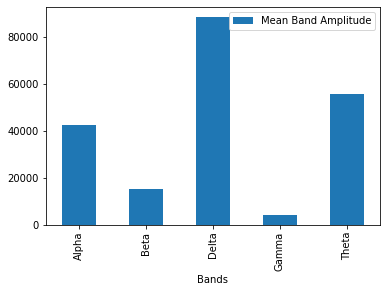

In [10]:
bands = list(patient_fft.columns)
values = [patient_fft.loc['F7'][i] for i in list(patient_fft.columns)]
df = pd.DataFrame({
    'Bands':bands,
    'Mean Band Amplitude':values
})
df.plot(x="Bands", y="Mean Band Amplitude", kind="bar")

## Healthy Frequency Plot

<AxesSubplot:xlabel='Bands'>

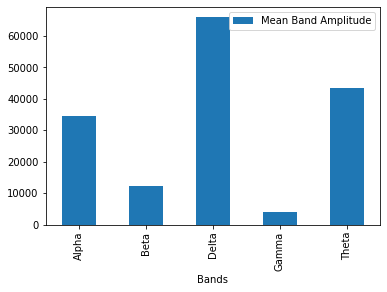

In [11]:
bands = list(healthy_fft.columns)
values = [healthy_fft.loc['F7'][i] for i in list(healthy_fft.columns)]
df = pd.DataFrame({
    'Bands':bands,
    'Mean Band Amplitude':values
})
df.plot(x="Bands", y="Mean Band Amplitude", kind="bar")